## Face recognition

Face recognition is the general computer vision task of identifying and verifying a person based on a photograph of their face. We will do a face recognition systems for face identification and verification using the VGGFace2 deep learning model.

- Face Verification. A one-to-one mapping of a given face against a known identity

- Face Identification. A one-to-many mapping for a given face against a database of known faces

We will develop a face identification system to predict the name of celebrities in given photographs and face verification system to confirm the identity of a person given a photograph of their face.

In [1]:
!pip install git+https://github.com/rcmalli/keras-vggface.git

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-udoytssn
  Stored in directory: /tmp/pip-ephem-wheel-cache-fulrue8y/wheels/36/07/46/06c25ce8e9cd396dabe151ea1d8a2bc28dafcb11321c1f3a6d
Successfully built keras-vggface


In [2]:
# check version of keras_vggface
import keras_vggface
# print version
print(keras_vggface.__version__)

Using TensorFlow backend.


0.5


## Detect Faces for Face Recognition

Before we can perform face recognition, we need to detect faces. Face detection is the process of automatically locating faces in a photograph and localizing them by drawing a bounding box around their extent using Multi-Task Cascaded Convolutional Neural Network or face detection. 

In [3]:
!pip install mtcnn

In [4]:
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

0.0.8


In [5]:
!wget https://en.wikipedia.org/wiki/File:Sharon_Stone_Cannes_2013_2.jpg     
!wget https://machinelearningmastery.com/wp-content/uploads/2019/03/sharon_stone1.jpg

--2019-04-13 16:09:13--  https://en.wikipedia.org/wiki/File:Sharon_Stone_Cannes_2013_2.jpg
Resolving en.wikipedia.org (en.wikipedia.org)... 208.80.154.224, 2620:0:861:ed1a::1
Connecting to en.wikipedia.org (en.wikipedia.org)|208.80.154.224|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36451 (36K) [text/html]
Saving to: ‘File:Sharon_Stone_Cannes_2013_2.jpg.1’

File:Sharon_Stone_C 100%[===================>]  35.60K  --.-KB/s    in 0.01s   

2019-04-13 16:09:13 (2.71 MB/s) - ‘File:Sharon_Stone_Cannes_2013_2.jpg.1’ saved [36451/36451]

--2019-04-13 16:09:14--  https://machinelearningmastery.com/wp-content/uploads/2019/03/sharon_stone1.jpg
Resolving machinelearningmastery.com (machinelearningmastery.com)... 35.196.45.101
Connecting to machinelearningmastery.com (machinelearningmastery.com)|35.196.45.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82711 (81K) [image/jpeg]
Saving to: ‘sharon_stone1.jpg.1’

sharon_stone1.jpg.1 100%[====

In [0]:
# example of face detection with mtcnn
from matplotlib import pyplot
from PIL import Image

from numpy import asarray
from scipy.spatial.distance import cosine

from mtcnn.mtcnn import MTCNN

In [0]:
# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
  # load image from file
  pixels = pyplot.imread(filename)
  # create the detector, using default weights
  detector = MTCNN()
  # detect faces in the image
  results = detector.detect_faces(pixels)
  # extract the bounding box from the first face
  x1, y1, width, height = results[0]['box'] 
  x2, y2 = x1 + width, y1 + height
  # extract the face coordinates
  face = pixels[y1:y2, x1:x2]
  # resize pixels to the model size
  image = Image.fromarray(face)
  image = image.resize(required_size)
  face_array = asarray(image)
  return face_array

loads the photograph, extracts the face, and plots the result. We can see that the face was correctly detected and extracted. We can use as example for the VGGFace face recognition model in subsequent sections.

In [8]:
# load the photo and extract the face
pixels = extract_face('sharon_stone1.jpg')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


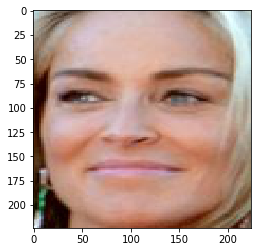

In [9]:
# plot the extracted face 
pyplot.imshow(pixels)

## Perform Face Identification With VGGFace2

We will use the VGGFace2 model to perform face recognition with photographs of celebrities from Wikipedia.

We will use pre-trained VGGModels, a VGGFace1 model via model=‘vgg16’ (the default), and two VGGFace2 models ‘resnet50’ and ‘senet50’. 

In [0]:
# Example of face detection with a vggface2 model (Sharon Stone)
from numpy import expand_dims
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions

# example of creating a face embedding
from keras_vggface.vggface import VGGFace 

In [0]:
# load the photo and extract the face
pixels = extract_face('sharon_stone1.jpg')

In [0]:
# convert one face into samples
pixels = pixels.astype('float32')
samples = expand_dims(pixels, axis=0)

Before we can make a prediction with a face, the pixel values must be scaled in the same way that data was prepared when the VGGFace model was fit. Specifically, the pixel values must be centered on each channel using the mean from the training dataset. The images are scaled using the mean values used to train the VGGFace2 models instead of the VGGFace1 models (the default).

In [0]:
# prepare the face for the model, e.g. center pixels
samples = preprocess_input(samples, version=2)

In [28]:
# create a vggface2 model
model = VGGFace(model='resnet50')

# summarize input and output shape 
print('Inputs: %s' % model.inputs) 
print('Outputs: %s' % model.outputs)

Inputs: [<tf.Tensor 'input_3:0' shape=(?, 224, 224, 3) dtype=float32>]
Outputs: [<tf.Tensor 'classifier_2/Softmax:0' shape=(?, 8631) dtype=float32>]


Predict the probability of a given face belonging to one or more of more than eight thousand known celebrities. Once a prediction is made, the class integers can be mapped to the names of the celebrities, and the top five names with the highest probability can be retrieved.

In [0]:
# perform prediction
yhat = model.predict(samples)

In [31]:
# convert prediction into names 
results = decode_predictions(yhat)

1351680/1346516 [==============================] - 0s 0us/step


Decoding prediction made by a VGGFace model.


In [33]:
# convert prediction into names
# display most likely results
for result in results[0]:
  print('%s: %.3f%%' % (result[0][3:-1], result[1]*100))

Sharon_Stone: 99.642%
Noelle_Reno: 0.085%
Elisabeth_R\xc3\xb6hm: 0.033%
Anita_Lipnicka: 0.026%
Tina_Maze: 0.019%


In [50]:
!wget https://machinelearningmastery.com/wp-content/uploads/2019/03/channing_tatum.jpg

--2019-04-13 17:53:11--  https://machinelearningmastery.com/wp-content/uploads/2019/03/channing_tatum.jpg
Resolving machinelearningmastery.com (machinelearningmastery.com)... 35.196.45.101
Connecting to machinelearningmastery.com (machinelearningmastery.com)|35.196.45.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 230984 (226K) [image/jpeg]
Saving to: ‘channing_tatum.jpg’

channing_tatum.jpg  100%[===================>] 225.57K  --.-KB/s    in 0.002s  

2019-04-13 17:53:11 (111 MB/s) - ‘channing_tatum.jpg’ saved [230984/230984]



In [0]:
# load the photo and extract the face
pixels = extract_face('channing_tatum.jpg')

In [0]:
# convert one face into samples
pixels = pixels.astype('float32')
samples = expand_dims(pixels, axis=0)

In [0]:
# prepare the face for the model, e.g. center pixels
samples = preprocess_input(samples, version=2)

In [0]:
# create a vggface model
model = VGGFace(model='resnet50')

In [0]:
# perform prediction
yhat = model.predict(samples)

In [0]:
# convert prediction into names 
results = decode_predictions(yhat)

The example loads the photograph, extracts the single face that we know was present, and then predicts the identity for the face. The top five highest probability names are then displayed. We can see that the model correctly identifies the face as belonging to Channing Tatum with a likelihood of 94.433%

In [69]:
# display most likely results
for result in results[0]:
  print('%s: %.3f%%' % (result[0][3:-1], result[1]*100))

Channing_Tatum: 94.433%
Eoghan_Quigg: 0.146%
Les_Miles: 0.113%
Ibrahim_Afellay: 0.072%
Tovah_Feldshuh: 0.070%


We try other versions of the model, such as ‘vgg16’ and ‘senet50’, then compare results.

In [58]:
# create a vggface model
model = VGGFace(model='vgg16')

580075520/580070376 [==============================] - 6s 0us/step


In [0]:
# perform prediction
yhat = model.predict(samples)

In [60]:
# convert prediction into names 
results = decode_predictions(yhat)

352256/346184 [==============================] - 0s 0us/step


In [61]:
# display most likely results
for result in results[0]:
  print('%s: %.3f%%' % (result[0][3:-1], result[1]*100))

anny_Webb: 5.786%
hris_Young: 3.339%
delaide_Clemens: 2.798%
hristopher_Egan: 2.747%
na_Ivanovic: 2.373%


In [62]:
# create a vggface model
model = VGGFace(model='senet50')

175693824/175688524 [==============================] - 2s 0us/step


In [0]:
# perform prediction
yhat = model.predict(samples)

In [0]:
# convert prediction into names 
results = decode_predictions(yhat)

In [65]:
# display most likely results
for result in results[0]:
  print('%s: %.3f%%' % (result[0][3:-1], result[1]*100))

Phylicia_Rash\xc4\x81d: 0.058%
Roger_Donaldson: 0.052%
Richa_Soni: 0.046%
Cris_Vianna: 0.046%
Shabana_Azmi: 0.044%


## Perform Face Verification With VGGFace2

The VGGFace2 model can be used for face verification. This involves calculating a face embedding for a new given face and comparing the embedding to the embedding for the single example of the face known to the system. A face embedding is a vector that represents the features extracted from the face. This can then be compared with the vectors generated for other faces.

###  VGGFace model to predict a face embedding.

In [70]:
# create a vggface model
model = VGGFace(model='resnet50', 
                include_top=False, 
                input_shape=(224, 224, 3), 
                pooling='avg')

94699520/94694792 [==============================] - 1s 0us/step


We set pooling to avg so that the filter maps at the output end of the model are reduced to a vector using global average pooling. This model can then be used to make a prediction, which will return a face embedding for one or more faces provided as input.


In [0]:
# perform prediction
yhat = model.predict(samples)

Predicting face embeddings for a list of photographs.

In [0]:
# extract faces and calculate face embeddings for a list of photo files
def get_embeddings(filenames):
  # extract faces
  faces = [extract_face(f) for f in filenames]
  # convert into an array of samples
  samples = asarray(faces, 'float32')
  # prepare the face for the model, e.g. center pixels
  samples = preprocess_input(samples, version=2)
  # create a vggface model
  model = VGGFace(model='resnet50', 
                  include_top=False, input_shape=(224, 224, 3),
  pooling='avg')
  # perform prediction
  yhat = model.predict(samples) 
  return yhat

Verification can be performed by calculating the Cosine distance between the embedding for the known identity and the embeddings of candidate faces, which can be achieved calcualting the cosine between the embedings.

The maximum distance between two embeddings is a score of 1.0, whereas the minimum distance is 0.0. A common cut-off value used for face identity is between 0.4 and 0.6, such as 0.5, although this should be tuned for an application. The fucntion below calculats the distance between two embeddings.

In [0]:
# determine if a candidate face is a match for a known face
def is_match(known_embedding, candidate_embedding, thresh=0.5):
  # calculate distance between embeddings
  score = cosine(known_embedding, candidate_embedding)
  if score <= thresh:
    print('>face is a Match (%.3f <= %.3f)' % (score, thresh)) 
  else:
    print('>face is NOT a Match (%.3f > %.3f)' % (score, thresh))

In [82]:
!wget https://machinelearningmastery.com/wp-content/uploads/2019/03/sharon_stone2.jpg
!wget https://machinelearningmastery.com/wp-content/uploads/2019/03/sharon_stone3.jpg

--2019-04-13 18:16:27--  https://machinelearningmastery.com/wp-content/uploads/2019/03/sharon_stone2.jpg
Resolving machinelearningmastery.com (machinelearningmastery.com)... 35.196.45.101
Connecting to machinelearningmastery.com (machinelearningmastery.com)|35.196.45.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38658 (38K) [image/jpeg]
Saving to: ‘sharon_stone2.jpg’

sharon_stone2.jpg   100%[===================>]  37.75K  --.-KB/s    in 0s      

2019-04-13 18:16:27 (127 MB/s) - ‘sharon_stone2.jpg’ saved [38658/38658]

--2019-04-13 18:16:29--  https://machinelearningmastery.com/wp-content/uploads/2019/03/sharon_stone3.jpg
Resolving machinelearningmastery.com (machinelearningmastery.com)... 35.196.45.101
Connecting to machinelearningmastery.com (machinelearningmastery.com)|35.196.45.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4352336 (4.2M) [image/jpeg]
Saving to: ‘sharon_stone3.jpg.1’

sharon_stone3.jpg.1 100%[=========

In [0]:
# define filenames
filenames = ['sharon_stone1.jpg', 'sharon_stone2.jpg', 
             'sharon_stone3.jpg', 'channing_tatum.jpg']

We can take our photograph of Sharon Stone used sharon stone1.jpg as our definition of the identity of Sharon Stone by calculating and storing the face embedding for the face in that photograph. We can then calculate embeddings for faces in other photographs of Sharon Stone and test whether we can effectively verify her identity. We can also use faces from photographs of other people to confirm that they are not verified as Sharon Stone.

In [0]:
# get embeddings file filenames
embeddings = get_embeddings(filenames)

In [0]:
# define sharon stone
sharon_id = embeddings[0]

We can test out some positive examples by using more photos of Sharon Stone.

In [88]:
# verify known photos of sharon
print('Positive Tests') 
is_match(embeddings[0], embeddings[1]) 
is_match(embeddings[0], embeddings[2])

Positive Tests
>face is a Match (0.418 <= 0.500)
>face is a Match (0.295 <= 0.500)


We will test these two positive cases and the Channing Tatum photo from the previous section as a negative example.

In [89]:
# verify known photos of other people
print('Negative Tests') 
is_match(embeddings[0], embeddings[3])

Negative Tests
>face is NOT a Match (0.709 > 0.500)


The example, we can see that the system correctly verified the two positive cases given photos of Sharon Stone both earlier and later in time. We can also see that the photo of Channing Tatum is correctly not verified as Sharon Stone. It would be an interesting extension to explore the verification of other negative photos, such as photos of other female celebrities.